In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('Final.csv')

In [3]:
col = data.columns.tolist()
col = [c for c in col if c not in ["UNKNOWN Type", "First_Date", "Last_Date", "UserId", "Category", "Reinstall", "Uninstall", "Country", "Count_of_Visits", "Q1_Activity", "Q2_Activity", "Q3_Activity", "Q4_Activity", "First_Device", "First_OS"]]

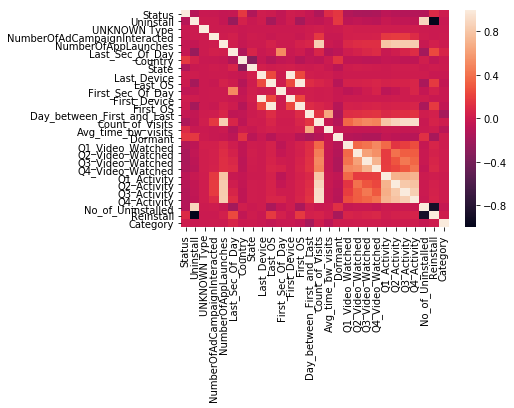

In [4]:
import seaborn as sns
%matplotlib inline

corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)


In [5]:
import time
start_time = time.time()
pca = PCA(n_components=2, random_state = 0)  
data1 = pca.fit_transform(data[col])
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.0861477851867676 seconds ---


In [6]:
data1

array([[318236.72973229, -58890.60163717],
       [-60903.19302761, -65541.27288193],
       [ 96872.00320186, -55117.91864366],
       ...,
       [-61151.85435823, -27361.38209612],
       [-61573.0531958 ,  37622.8830756 ],
       [-60973.69192195, -54820.76290599]])

In [7]:
np.sum(pca.explained_variance_ratio_)

0.9964495387308709

In [8]:
pca.explained_variance_

array([8.27874919e+10, 9.67256795e+08])

In [9]:
print("Optimum Number of Clusters: 5")

Optimum Number of Clusters: 5


In [10]:
from sklearn.cluster import KMeans

start_time = time.time()
kmeans = KMeans(n_clusters=5, random_state=0).fit(data[col])
print(kmeans.labels_)
print("--- %s seconds ---" % (time.time() - start_time))

[3 0 0 ... 0 0 0]
--- 18.641628742218018 seconds ---


In [11]:
centers = kmeans.cluster_centers_

In [12]:
clusters = pd.DataFrame(data = centers, columns = col)
clusters

,Status,NumberOfAdCampaignInteracted,NumberOfAppLaunches,Last_Sec_Of_Day,State,Last_Device,Last_OS,First_Sec_Of_Day,Day_between_First_and_Last,Avg_time_bw_visits,Dormant,Q1_Video_Watched,Q2_Video_Watched,Q3_Video_Watched,Q4_Video_Watched,No_of_Uninstalled
0,110.690023,1.115158,5.967700,44659.132213,41.715180,1.041502,1.074239,50047.458860,3.009534,1.022235e+04,0.861954,5.875850e-01,6.956066e-01,1.229607e+00,1.559688e+00,0.699470
1,250.190541,0.002703,1.604054,26826.372973,32.816216,1.059459,1.117568,52457.881081,110.635135,4.244025e+06,0.671622,4.440892e-15,-5.884182e-15,1.842970e-14,-1.709743e-14,0.605405
2,191.166268,0.137735,3.113086,28522.524051,37.951150,1.066477,1.135793,52024.179265,63.294443,1.127613e+06,0.841052,2.001793e-02,3.585300e-02,4.302360e-02,5.123992e-02,0.671198
3,132.352087,0.385717,4.179043,30451.723804,40.356192,1.065575,1.154097,51914.876059,39.989579,4.040721e+05,0.850639,1.177833e-01,1.540972e-01,2.279880e-01,2.920899e-01,0.756276
4,226.719697,0.028309,2.271132,26818.633174,35.903110,1.071770,1.125598,52360.007974,84.910686,2.286864e+06,0.782695,3.189793e-03,4.784689e-03,5.183413e-03,9.968102e-03,0.629187


In [13]:
clusters.to_csv('Clusters2.csv', index = False)

In [14]:
category = pd.DataFrame(data = kmeans.labels_, columns = ['Category'])

In [15]:
def category_words(x):
    if x == 0:
        cat = "Hyper Active User"
    if x == 1:
        cat = "Dormant"
    if x == 2:
        cat = "Active User"
    if x == 3:
        cat = "Hyper Active Guest"
    if x == 4:
        cat = "Active Guest"
    
    return cat

In [16]:
category['category_words'] = category['Category'].apply(lambda x : category_words(x))
category.head()

,Category,category_words
0,3,Hyper Active Guest
1,0,Hyper Active User
2,0,Hyper Active User
3,0,Hyper Active User
4,0,Hyper Active User


In [17]:
category.to_csv('Category2.csv', index = False)

In [18]:
y = category['Category']
#y = y.apply(lambda x : 1 if x == 0 else 0)

In [19]:
y.value_counts()

0    437180
3     19002
2      6694
4      2508
1       740
Name: Category, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.2, random_state=6)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=6)

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

parameters = {'C':[0.1,0.5,1,5]}
lr = LogisticRegression()
#grid = GridSearchCV(lr, parameters)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy Score: ", round(accuracy, 4))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score:  0.9509


In [22]:
from sklearn.metrics import classification_report

target_names = ['Hyper Active User', 'Dormant', 'Active User', 'Hyper Active Guest', 'Active Guest']
print(classification_report(y_val, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

 Hyper Active User       1.00      0.97      0.99     43653
           Dormant       1.00      0.14      0.24        81
       Active User       0.00      0.00      0.00       669
Hyper Active Guest       0.49      1.00      0.66      1925
      Active Guest       0.00      0.00      0.00       285

         micro avg       0.95      0.95      0.95     46613
         macro avg       0.50      0.42      0.38     46613
      weighted avg       0.96      0.95      0.95     46613



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
cf = confusion_matrix(y_val, y_pred)
print("Confusion Matrix: \n", cf)
acc =  accuracy_score(y_val, y_pred)
print("Accuray Score: \n", round(acc, 4))
target_names = ['Hyper Active User', 'Dormant', 'Active User', 'Hyper Active Guest', 'Active Guest']
print(classification_report(y_val, y_pred, target_names=target_names))

Confusion Matrix: 
 [[42390     0     0  1263     0]
 [    0    11    70     0     0]
 [    0     0     0   669     0]
 [    0     0     0  1925     0]
 [    0     0   194    91     0]]
Accuray Score: 
 0.9509
                    precision    recall  f1-score   support

 Hyper Active User       1.00      0.97      0.99     43653
           Dormant       1.00      0.14      0.24        81
       Active User       0.00      0.00      0.00       669
Hyper Active Guest       0.49      1.00      0.66      1925
      Active Guest       0.00      0.00      0.00       285

         micro avg       0.95      0.95      0.95     46613
         macro avg       0.50      0.42      0.38     46613
      weighted avg       0.96      0.95      0.95     46613



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
y_pred = lr.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cf)
acc =  accuracy_score(y_test, y_pred)
print("Accuray Score: \n", round(acc, 4))
target_names = ['Hyper Active User', 'Dormant', 'Active User', 'Hyper Active Guest', 'Active Guest']
print(classification_report(y_test, y_pred, target_names=target_names))

Confusion Matrix: 
 [[84885     0     0  2531     0]
 [    0    15   126     0     0]
 [    0     0     0  1322     0]
 [    0     0     0  3815     0]
 [    0     0   381   150     0]]
Accuray Score: 
 0.9516
                    precision    recall  f1-score   support

 Hyper Active User       1.00      0.97      0.99     87416
           Dormant       1.00      0.11      0.19       141
       Active User       0.00      0.00      0.00      1322
Hyper Active Guest       0.49      1.00      0.66      3815
      Active Guest       0.00      0.00      0.00       531

         micro avg       0.95      0.95      0.95     93225
         macro avg       0.50      0.42      0.37     93225
      weighted avg       0.96      0.95      0.95     93225



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(LogisticRegression(), n_estimators=100, max_samples=100, random_state=0)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy Score: ", round(accuracy, 4))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

Accuracy Score:  0.9574


In [26]:
y_pred = bagging_clf.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cf)
acc =  accuracy_score(y_test, y_pred)
print("Accuray Score: \n", round(acc, 4))
target_names = ['Hyper Active User', 'Dormant', 'Active User', 'Hyper Active Guest', 'Active Guest']
print(classification_report(y_test, y_pred, target_names=target_names))

Confusion Matrix: 
 [[84625     0     0  2791     0]
 [    0     0    56    85     0]
 [    0     0   854   468     0]
 [    0     0     0  3815     0]
 [    0     0   524     7     0]]
Accuray Score: 
 0.9578
                    precision    recall  f1-score   support

 Hyper Active User       1.00      0.97      0.98     87416
           Dormant       0.00      0.00      0.00       141
       Active User       0.60      0.65      0.62      1322
Hyper Active Guest       0.53      1.00      0.69      3815
      Active Guest       0.00      0.00      0.00       531

         micro avg       0.96      0.96      0.96     93225
         macro avg       0.43      0.52      0.46     93225
      weighted avg       0.97      0.96      0.96     93225



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
from sklearn.svm import LinearSVC

model = LinearSVC(random_state=0)
model.fit(X_train, y_train) 
y_pred = model.predict(X_val)
accuracy = model.score(X_test, y_test)
print("Accuracy of the model: ",accuracy)

Accuracy of the model:  0.898911236256369


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [28]:

cf = confusion_matrix(y_val, y_pred)
print("Confusion Matrix: \n", cf)
acc =  accuracy_score(y_val, y_pred)
print("Accuray Score: \n", round(acc, 4))
target_names = ['Hyper Active User', 'Dormant', 'Active User', 'Hyper Active Guest', 'Active Guest']
print(classification_report(y_val, y_pred, target_names=target_names))

Confusion Matrix: 
 [[41148   775  1730     0     0]
 [    0     0    81     0     0]
 [    0     0   669     0     0]
 [    0     5  1920     0     0]
 [    0     0   285     0     0]]
Accuray Score: 
 0.8971
                    precision    recall  f1-score   support

 Hyper Active User       1.00      0.94      0.97     43653
           Dormant       0.00      0.00      0.00        81
       Active User       0.14      1.00      0.25       669
Hyper Active Guest       0.00      0.00      0.00      1925
      Active Guest       0.00      0.00      0.00       285

         micro avg       0.90      0.90      0.90     46613
         macro avg       0.23      0.39      0.24     46613
      weighted avg       0.94      0.90      0.91     46613



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
y_pred = model.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cf)
acc =  accuracy_score(y_test, y_pred)
print("Accuray Score: \n", round(acc, 4))
target_names = ['Hyper Active User', 'Dormant', 'Active User', 'Hyper Active Guest', 'Active Guest']
print(classification_report(y_test, y_pred, target_names=target_names))

Confusion Matrix: 
 [[82479  1452  3485     0     0]
 [    0     0   141     0     0]
 [    0     0  1322     0     0]
 [    0     8  3807     0     0]
 [    0     0   531     0     0]]
Accuray Score: 
 0.8989
                    precision    recall  f1-score   support

 Hyper Active User       1.00      0.94      0.97     87416
           Dormant       0.00      0.00      0.00       141
       Active User       0.14      1.00      0.25      1322
Hyper Active Guest       0.00      0.00      0.00      3815
      Active Guest       0.00      0.00      0.00       531

         micro avg       0.90      0.90      0.90     93225
         macro avg       0.23      0.39      0.24     93225
      weighted avg       0.94      0.90      0.91     93225



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
